In [37]:
#importing the packages that we need : 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('epa-sea-level.csv')
from scipy import stats

In [38]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [39]:
df.info

<bound method DataFrame.info of      Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0    1880                  0.000000          -0.952756           0.952756   
1    1881                  0.220472          -0.732283           1.173228   
2    1882                 -0.440945          -1.346457           0.464567   
3    1883                 -0.232283          -1.129921           0.665354   
4    1884                  0.590551          -0.283465           1.464567   
..    ...                       ...                ...                ...   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.661417   
133  2013                  8.980315           8.622047           9.338583   

     NOAA Adjusted Sea Level  
0           

In [40]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [41]:
df.shape

(134, 5)

In [42]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [43]:
pd.to_datetime(df['Year'])

0     1970-01-01 00:00:00.000001880
1     1970-01-01 00:00:00.000001881
2     1970-01-01 00:00:00.000001882
3     1970-01-01 00:00:00.000001883
4     1970-01-01 00:00:00.000001884
                   ...             
129   1970-01-01 00:00:00.000002009
130   1970-01-01 00:00:00.000002010
131   1970-01-01 00:00:00.000002011
132   1970-01-01 00:00:00.000002012
133   1970-01-01 00:00:00.000002013
Name: Year, Length: 134, dtype: datetime64[ns]

In [44]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


<h1>Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.<h1>

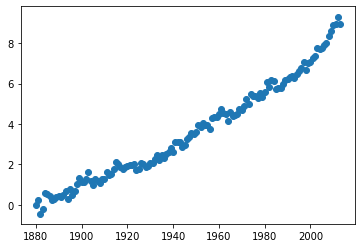

In [45]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.show()

<h1>Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.<h1>

In [90]:
res_l = stats.linregress(df['Year'],df['CSIRO Adjusted Sea Level'])

In [91]:
print(f"R-squared: {res_l.rvalue**2:.6f}")

R-squared: 0.969747


slope (95%): 0.063045 +/- 0.001917
intercept (95%): -119.065942 +/- 0.001917


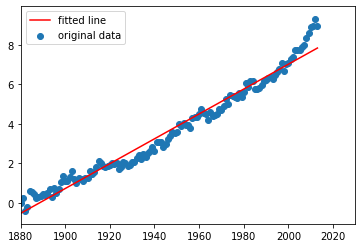

In [93]:
from scipy.stats import t
end_year = 2050
years = np.array([df['Year'].min(), end_year])
plt.plot(df['Year'], res_l.intercept + res_l.slope*df['Year'], 'r', label='fitted line')
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label = 'original data')
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(df['Year'])-2)
intercept = res_l.intercept
print(f"slope (95%): {res_l.slope:.6f} +/- {ts*res_l.stderr:.6f}")
print(f"intercept (95%): {res_l.intercept:.6f}" f" +/- {ts*res_l.stderr:.6f}")
res_l.intercept
plt.legend()
plt.xlim([1880,2030])
plt.show()


In [89]:
intercept

-119.06594196773978